In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from eval import *

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# ToM-MMS

In [2]:
mode = 'IMQ-MMS'
results_npp, results_p, results_pw, results_cpp_sd = load_bootstrapping_results(mode)
parameters_npp, parameters_p, parameters_pw, parameters_cpp_sd, combination, titles = construct_parameter_configurations(mode)
results_pp = [results_p[i]+results_pw[i] for i in range(12)]
parameters_pp = []
parameters_pp.extend(parameters_p)
parameters_pp.extend(parameters_pw)

In [3]:
_, _, bsm_npp_1 = model_selection(results_npp, combination, parameters_npp, titles, mms_pc='NPP')

12it [01:20,  6.69s/it]


In [4]:
_, _, bsm_pp_1 = model_selection(results_pp, combination, parameters_pp, titles)

12it [01:44,  8.73s/it]


In [5]:
_, _, bsm_cpp_sd_1 = model_selection(results_cpp_sd, combination, parameters_cpp_sd, titles)

12it [01:25,  7.12s/it]


# rsFC-MMS

In [6]:
mode = 'rsFC-MMS'
results_npp, results_p, results_pw, results_cpp_sd = load_bootstrapping_results(mode)
parameters_npp, parameters_p, parameters_pw, parameters_cpp_sd, combination, titles = construct_parameter_configurations(mode)
results_pp = [results_p[i]+results_pw[i] for i in range(16)]
parameters_pp = []
parameters_pp.extend(parameters_p)
parameters_pp.extend(parameters_pw)

In [7]:
_, _, bsm_npp_3 = model_selection(results_npp, combination, parameters_npp, titles, mms_pc='NPP')

16it [00:36,  2.29s/it]


In [8]:
_, _, bsm_pp_3 = model_selection(results_pp, combination, parameters_pp, titles)

16it [02:08,  8.00s/it]


In [9]:
_, _, bsm_cpp_sd_3 = model_selection(results_cpp_sd, combination, parameters_cpp_sd, titles)

16it [00:42,  2.67s/it]


In [10]:
df_cpp_sd_vs_pp = DataFrame(
    {
        'pp': [i[0] for i in bsm_pp_1] + [i[0] for i in bsm_pp_3],
        'cpp_sd': [i[0] for i in bsm_cpp_sd_1] + [i[0] for i in bsm_cpp_sd_3],
        'class': ['IMQ']*12+['rs-FC']*16,
        'pp_sample': [i[1] for i in bsm_pp_1] + [i[1] for i in bsm_pp_3],
        'cpp_sd_sample': [i[1] for i in bsm_cpp_sd_1] + [i[1] for i in bsm_cpp_sd_3],
    })

df_pp_vs_npp = DataFrame(
    {
        'npp': [i[0] for i in bsm_npp_1] + [i[0] for i in bsm_npp_3],
        'pp': [i[0] for i in bsm_pp_1] + [i[0] for i in bsm_pp_3],
        'class': ['IMQ']*12+['rs-FC']*16,
        'npp_sample': [i[1] for i in bsm_npp_1] + [i[1] for i in bsm_npp_3],
        'pp_sample': [i[1] for i in bsm_pp_1] + [i[1] for i in bsm_pp_3],
    })

In [11]:
for i in range(28):
    
    print(kstest(np.array(df_cpp_sd_vs_pp['cpp_sd_sample'][i])-np.array(df_cpp_sd_vs_pp['pp_sample'][i]), cdf="norm"))

KstestResult(statistic=0.4412774295532606, pvalue=7.390354295972073e-178)
KstestResult(statistic=0.45802535560508917, pvalue=2.3588759094343638e-192)
KstestResult(statistic=0.37762874514874, pvalue=1.245888616401981e-128)
KstestResult(statistic=0.3875530434207742, pvalue=1.0243421933763116e-135)
KstestResult(statistic=0.43198132834999414, pvalue=4.263901383694968e-170)
KstestResult(statistic=0.44014011434799083, pvalue=6.745397484436691e-177)
KstestResult(statistic=0.4191705425022968, pvalue=9.967836225099418e-160)
KstestResult(statistic=0.3447904565394275, pvalue=1.1144923243307318e-106)
KstestResult(statistic=0.3456933923975324, pvalue=2.9759302721737613e-107)
KstestResult(statistic=0.44354422914010294, pvalue=8.821480723373633e-180)
KstestResult(statistic=0.4253978106856568, pvalue=1.0122541594861948e-164)
KstestResult(statistic=0.40453474408419543, pvalue=2.4517078696336542e-148)
KstestResult(statistic=0.3390434722462411, pvalue=4.545878645575507e-103)
KstestResult(statistic=0.4584

In [12]:
for i in range(28):
    
    print(kstest(np.array(df_pp_vs_npp['pp_sample'][i])-np.array(df_pp_vs_npp['npp_sample'][i]), cdf="norm"))

KstestResult(statistic=0.3439570802987871, pvalue=3.7571705257441534e-106)
KstestResult(statistic=0.4575717770096279, pvalue=5.944491315348311e-192)
KstestResult(statistic=0.29067934584742633, pvalue=2.493051349134077e-75)
KstestResult(statistic=0.43901686959532005, pvalue=5.949732522656899e-176)
KstestResult(statistic=0.35442872792595326, pvalue=6.895985842536025e-113)
KstestResult(statistic=0.4578118682591547, pvalue=3.645017496351207e-192)
KstestResult(statistic=0.3812655535187309, pvalue=3.340319873612981e-131)
KstestResult(statistic=0.42778591953426587, pvalue=1.1665370109046774e-166)
KstestResult(statistic=0.45471460362179617, pvalue=1.9556610928754134e-189)
KstestResult(statistic=0.4626974959891231, pvalue=1.6181416413870307e-196)
KstestResult(statistic=0.4750114991763091, pvalue=9.548991689192221e-208)
KstestResult(statistic=0.44532368221942703, pvalue=2.6755139427731595e-181)
KstestResult(statistic=0.45924719627038346, pvalue=1.9450412135667087e-193)
KstestResult(statistic=0.3

In [13]:
# Since p-values from Kolmogorov-Smirnov tests all less than .05, we next adopt Wilcoxon signed-rank tests rather than paired T-tests.

diffs_1, pvals_1 = [], []

for i in range(28):
    
    _, pval = wilcoxon(df_cpp_sd_vs_pp['cpp_sd_sample'][i], df_cpp_sd_vs_pp['pp_sample'][i], alternative='two-sided')
    diffs_1.append(np.mean(np.array(df_cpp_sd_vs_pp['cpp_sd_sample'][i])-np.array(df_cpp_sd_vs_pp['pp_sample'][i])))
    pvals_1.append(pval)
    
diffs_2, pvals_2 = [], []

for i in range(28):
    
    _, pval = wilcoxon(df_pp_vs_npp['pp_sample'][i], df_pp_vs_npp['npp_sample'][i], alternative='two-sided')
    diffs_2.append(np.mean(np.array(df_pp_vs_npp['pp_sample'][i])-np.array(df_pp_vs_npp['npp_sample'][i])))
    pvals_2.append(pval)

# Finally, We corrected multiple comparisons by controlling the expected FDR at 0.05.

cr = multipletests(pvals_1+pvals_2, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

print("CPP-SD vs Pipeline 2 (PP):")

for i in range(28):
    
    if cr[0][i] == False:
        print('    '+str(i)+" Not Significant with p=%.4f" % (cr[1][i]))
    else:
        if diffs_1[i] > 0:
            print('    '+str(i)+" CPP-SD Win with p=%.4f" % (cr[1][i]))
        else:
            print('    '+str(i)+" CPP-SD Loss with p=%.4f" % (cr[1][i]))
print(" ")
print("Pipeline 2 (PP) vs Pipeline 1 (NPP):")
            
for i in range(28):
    
    if cr[0][i+28] == False:
        print('    '+str(i)+" Not Significant with p=%.4f" % (cr[1][i+28]))
    else:
        if diffs_2[i] > 0:
            print('    '+str(i)+" PP Win with p=%.4f" % (cr[1][i+28]))
        else:
            print('    '+str(i)+" PP Loss with p=%.4f" % (cr[1][i+28]))

CPP-SD vs Pipeline 2 (PP):
    0 CPP-SD Win with p=0.0000
    1 CPP-SD Loss with p=0.0000
    2 CPP-SD Win with p=0.0000
    3 CPP-SD Win with p=0.0000
    4 CPP-SD Loss with p=0.0000
    5 CPP-SD Loss with p=0.0000
    6 CPP-SD Win with p=0.0000
    7 CPP-SD Win with p=0.0000
    8 CPP-SD Win with p=0.0000
    9 CPP-SD Win with p=0.0000
    10 CPP-SD Win with p=0.0000
    11 CPP-SD Win with p=0.0000
    12 Not Significant with p=0.0661
    13 CPP-SD Win with p=0.0000
    14 Not Significant with p=0.0525
    15 CPP-SD Win with p=0.0000
    16 CPP-SD Win with p=0.0000
    17 CPP-SD Win with p=0.0000
    18 CPP-SD Win with p=0.0000
    19 CPP-SD Win with p=0.0000
    20 CPP-SD Win with p=0.0000
    21 CPP-SD Win with p=0.0000
    22 CPP-SD Win with p=0.0000
    23 CPP-SD Win with p=0.0000
    24 Not Significant with p=0.0525
    25 CPP-SD Win with p=0.0000
    26 CPP-SD Win with p=0.0000
    27 CPP-SD Win with p=0.0000
 
Pipeline 2 (PP) vs Pipeline 1 (NPP):
    0 PP Win with p=0.0000
   

# Figure 8(a)

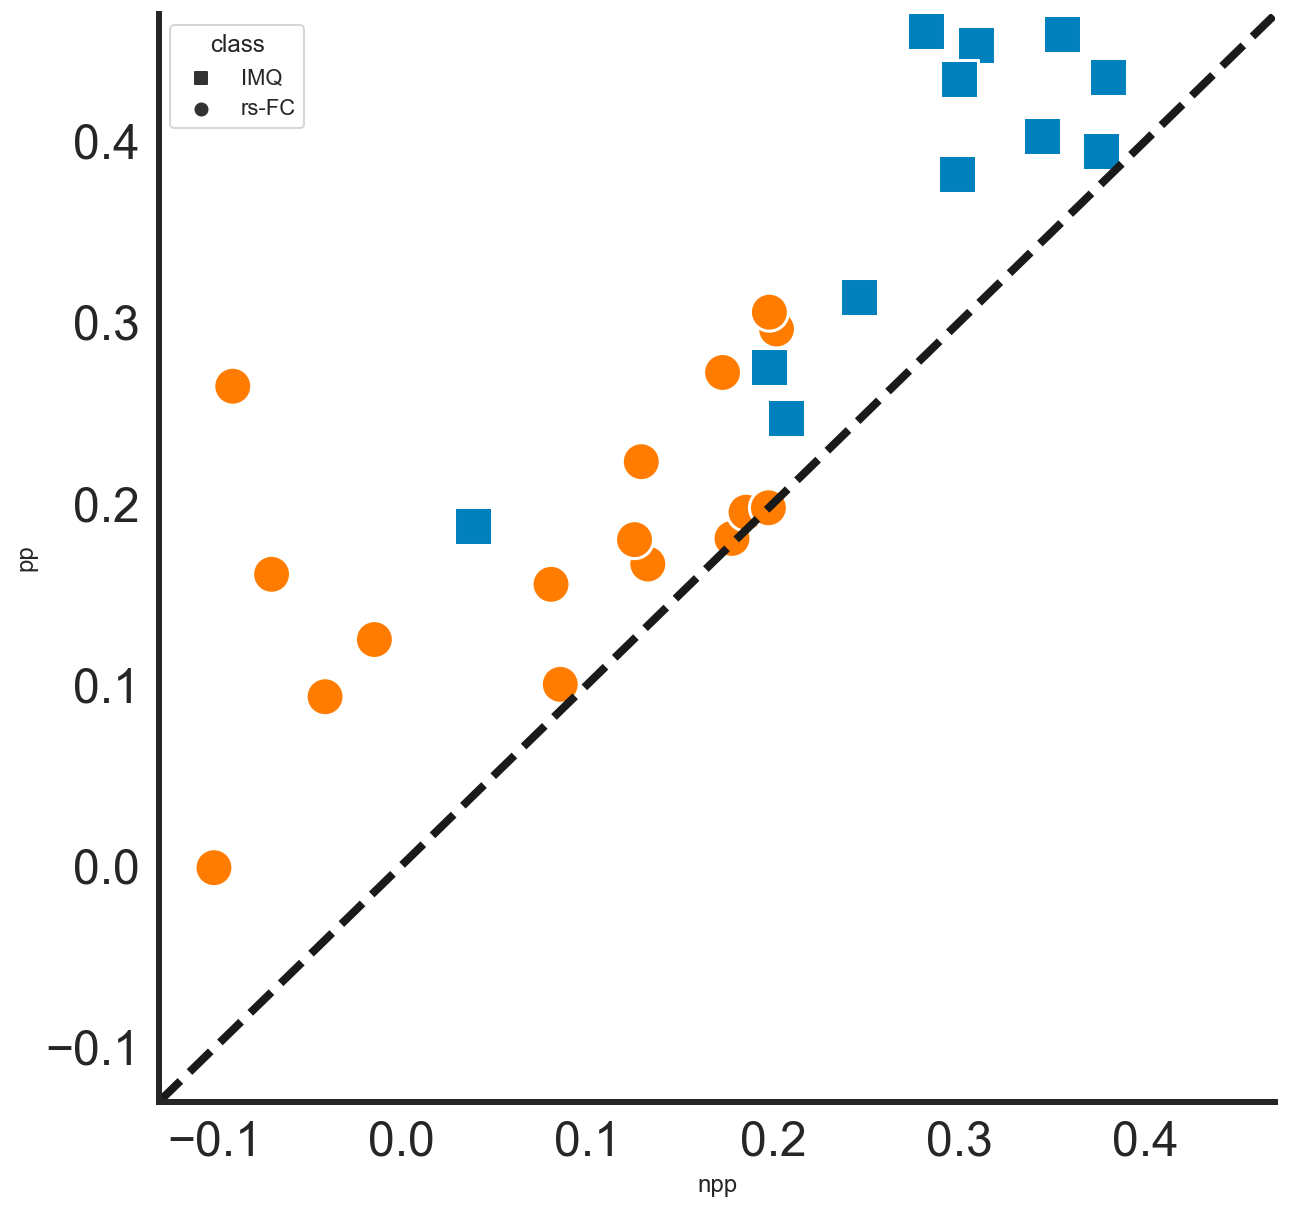

In [14]:
markers = {"IMQ": "s", "rs-FC": "o"}
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("white")
ax = sns.scatterplot(data=df_pp_vs_npp,
                x='npp',
                y='pp',
                s=360,
                style='class',
                c=['#0080BC']*12+['#FF7C00']*16,
                markers=markers)
ax.set_xlim(-0.13, 0.47)
ax.set_ylim(-0.13, 0.47)
ax.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4])
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.plot([-0.13, 0.47], 
        [-0.13, 0.47], 
        linewidth=4,
        linestyle='dashed',
        color='k')
ax.grid(False)
sns.despine()
#plt.savefig('./pp_npp.pdf', dpi=666)

# Figure 8(b)

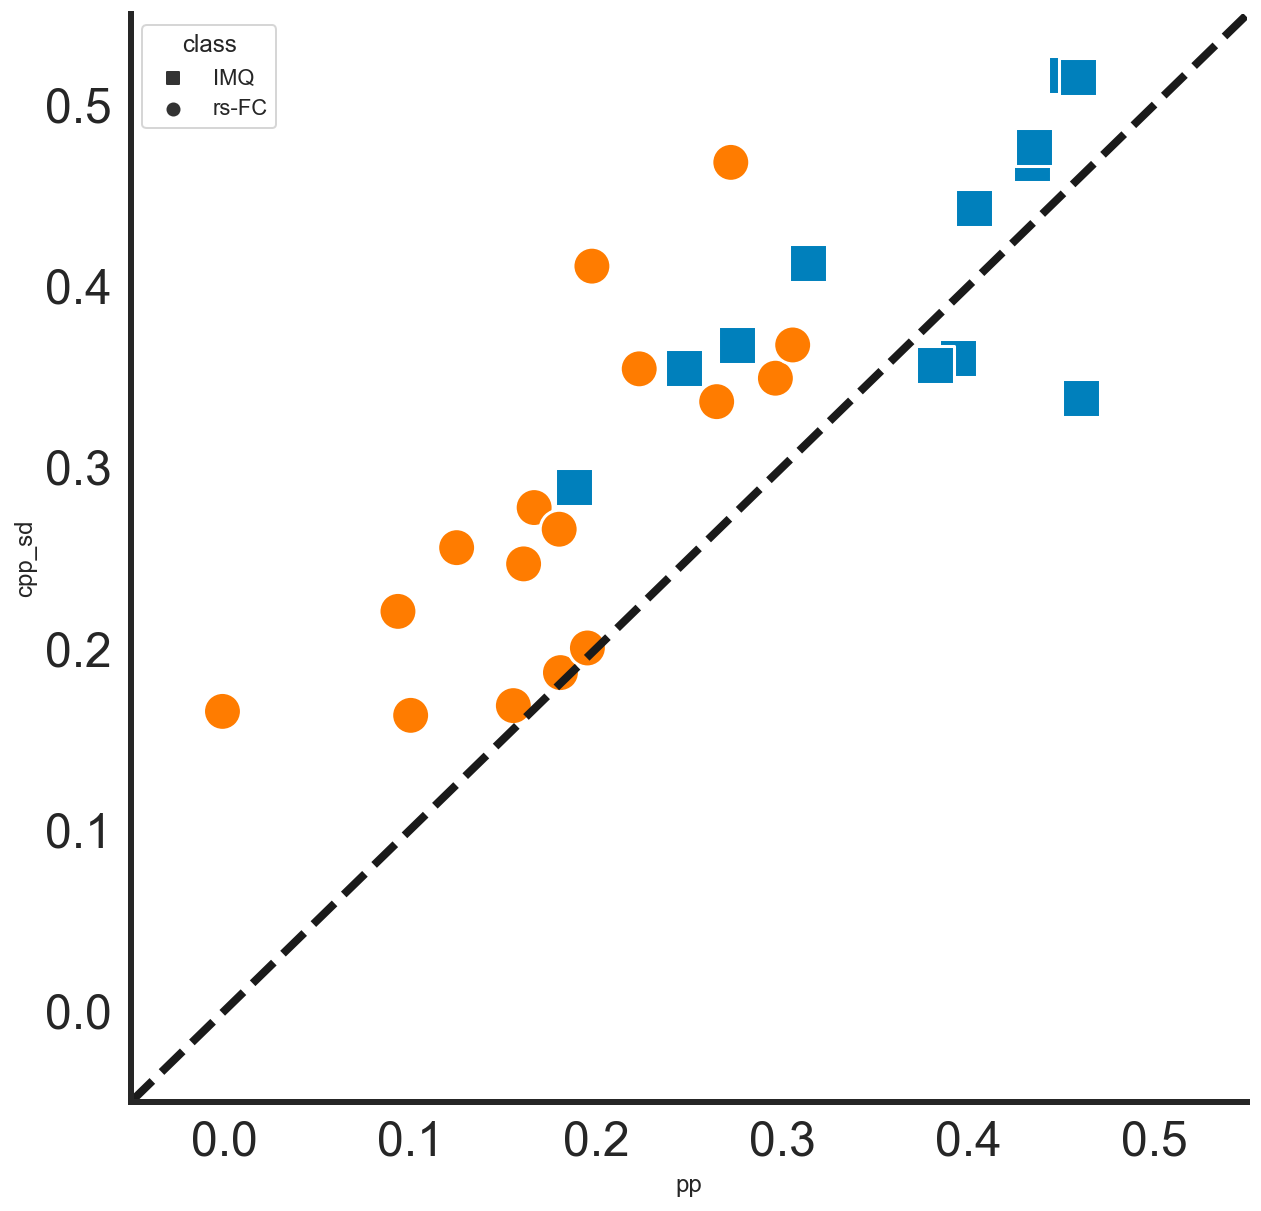

In [16]:
markers = {"IMQ": "s", "rs-FC": "o"}
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("white")
ax = sns.scatterplot(data=df_cpp_sd_vs_pp,
                x='pp',
                y='cpp_sd', 
                s=360,
                style='class',
                c=['#0080BC']*12+['#FF7C00']*16,
                markers=markers)
ax.set_xlim(-0.05, 0.55)
ax.set_ylim(-0.05, 0.55)
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.tick_params(axis='x',labelsize=24)
ax.tick_params(axis='y',labelsize=24)
ax.plot([-0.05, 0.55], 
        [-0.05, 0.55], 
        linewidth=4,
        linestyle='dashed',
        color='k')
ax.grid(False)
sns.despine()
#plt.savefig('./ppsd_pp.pdf', dpi=666)